# **Reporte de los datos**
---


### **1.1. Características generales de los datos**
---

A continuación se presenta un revisión general delos datos, para esto se reliza nuevamente el cargue de los datos y se implimentan estadísticas descriptivas con el fin de observar distribución, valores extremos o faltantes y la selección de variables de interés para el estudio.

In [1]:
# Librerías requeridas
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

# Cargar el archivo CSV
df = pd.read_csv('arabica_data_cleaned.csv')
df.head(4)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [4]:
df['Species'].unique()

array(['Arabica'], dtype=object)

Se observa que hay una elevada proporción (aprox. 44%) de variables que no cuentan con toda la información requerida (datos faltantes), sin embargo, en el presente estudio no se hará uso de todas ellas, por lo que más adelante se definirán las variables de interés y la acciones a seguir para tratar con valores faltantes u otros inconvenintes. Adicional a lo anterior se hace una revisión rápida de que la variable "Species" corresponda al tipo de café denominado "arábiga" y no a otro ya que únicamente hay inerés en este tipo de café dado que es el que se produce en el país.

## **Variable Objetivo**
El objetivo de este estudio se basa incialmente en predecir la puntuación de una buana taza de café en relación con las diferentes propiedades que están asocidas a esta puntuación, en este sentido, la variable objetivo corresponde a *Total.Cup.Points*, revisemos un poco las características de esta variable:

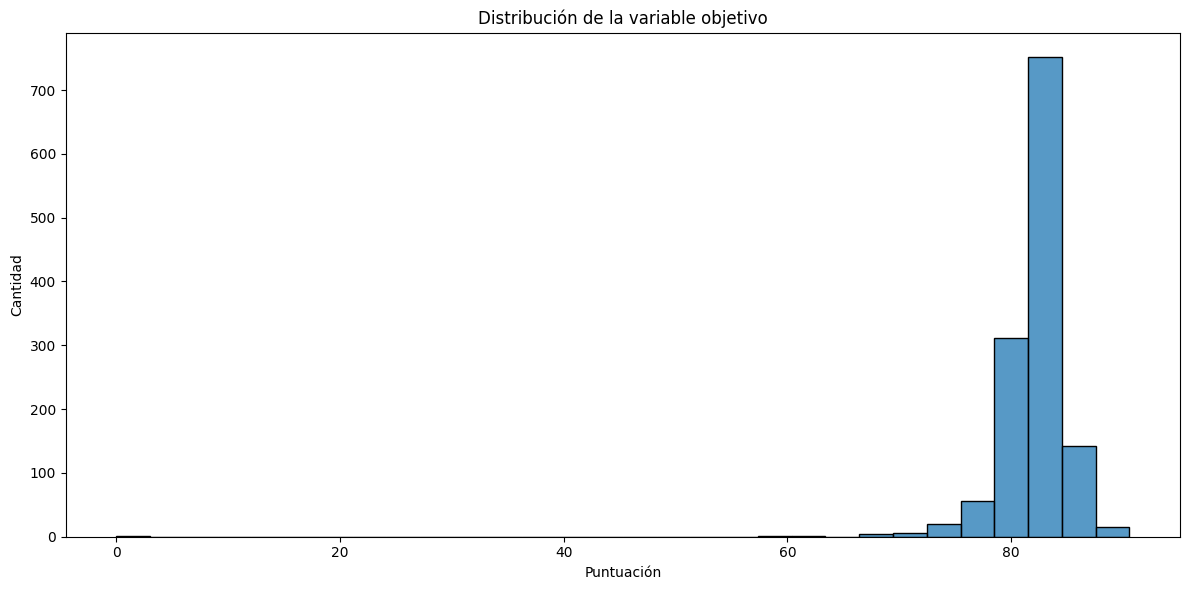

In [8]:
# Crear el gráfico de barras para la variable Total.Cup.Points
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Total.Cup.Points", bins=30);

# Personalizar el gráfico
plt.title('Distribución de la variable objetivo')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

Se observa una alta concentración de puntuaciones entre 70 y 90, la distribución es sesgada y se puede evidenciar una posible existencia de valores estremos inferiores. Estos datos pueden afectar el desempeño del modelo.

In [11]:
df["Total.Cup.Points"].describe()

,Total.Cup.Points
count,1311.000000
mean,82.115927
std,3.515761
min,0.000000
25%,81.170000
50%,82.500000
75%,83.670000
max,90.580000


Las medidas de tendencia central complemetan la infotmación de la gráfica, en este caso se entiende que la mayor cantidad de puntuaciones giran entorno a su media (82.11), algunos registros tienen puntuación de cero y en una escal de 0 a 100, la máxima puntuación recibida por parte de los catadores de cefé fue de 90.58.

### **1.2. Ranking de variables**
---
Se realizó la revisión bibliográfica especialmente algunas publicaciones realizadas por la Federación Nacional de Cafeteros de Colombia para trtar de determinar qué variables son consideredas importantes para definir un buen perfil de taza de café, como resultado, se decidió considerar las siguientes variables para orientar el estudio.


In [ ]:
variables = pd.read_excel('variables.xlsx')
variables

,Variables,Variable_español
0,Aroma,Aroma
1,Flavor,Sabor
2,Aftertaste,Retrosabor
3,Acidity,Acidez
4,Body,Cuerpo
5,Balance,Uniformidad
6,Clean Cup,Taza limpia
7,Sweetness,Dulzor
8,Cupper points,Puntos de taza
9,Country,País


### **1.3. Tipos de variables**
---

Las variables que se describen en el cuadro anterior serán la base del desarrrollo del trabajo, como se observa son de naturaleza numérica y cualitativa. A continuación se  construye una nueva tabla que relacione únicamente a estas variables.

In [ ]:
base_2 =df[['Aroma', 'Flavor','Aftertaste','Acidity','Body','Balance','Clean.Cup','Sweetness','Cupper.Points','Variety','Country.of.Origin','Moisture','Total.Cup.Points']]
base_2.head(4)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Clean.Cup,Sweetness,Cupper.Points,Variety,Country.of.Origin,Moisture,Total.Cup.Points
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,8.75,NaN,Ethiopia,0.12,90.58
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,8.58,Other,Ethiopia,0.12,89.92
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,9.25,Bourbon,Guatemala,0.00,89.75
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,8.67,NaN,Ethiopia,0.11,89.00


Observar que se cuenta con un total 15 variables, las cuales corresponden a las puntuaciones otorgadas por los catadores de café y el lugar de procedencia de las semillas.  
Los atributos asociados a los catadores son los siguientes:  


*   Aroma
*   Flavor
*   Aftertaste
*   Acidity
*   Body
*   Balance
*   Uniformity
*   Clean Cup
*   Sweetness
*   Cupper Points
*   Moisture

Estas variables son de tipo cuantitativo; algunas de sus estadísticas se presentan a continuación





In [13]:
base_cuanti =df[['Aroma', 'Flavor','Aftertaste','Acidity','Body','Balance','Clean.Cup','Sweetness','Cupper.Points','Variety','Moisture']]
base_cuanti.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Clean.Cup,Sweetness,Cupper.Points,Moisture
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.83312,9.903272,7.497864,0.088863
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.77135,0.530832,0.474610,0.047957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.00000,10.000000,7.250000,0.090000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.00000,10.000000,7.500000,0.110000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.00000,10.000000,7.750000,0.120000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.00000,10.000000,10.000000,0.280000


La mayoría de las variables tienen una puntuación promedio entre 7 y 7.6, solamente Clean Cup y Sweetness tienen puntuaciones cercanas a 10.

Como variable de tipo cualitativo se tiene a  Country, Typo y Variety, esta última cuenta con 1110 datos es decir que tiene aproximadamente un 15.3% de valores faltantes.  

A continuación se muestran algunas gráficas para las variables Variety y Country.


## **Relación entre variable objetivo y variables explicativas**

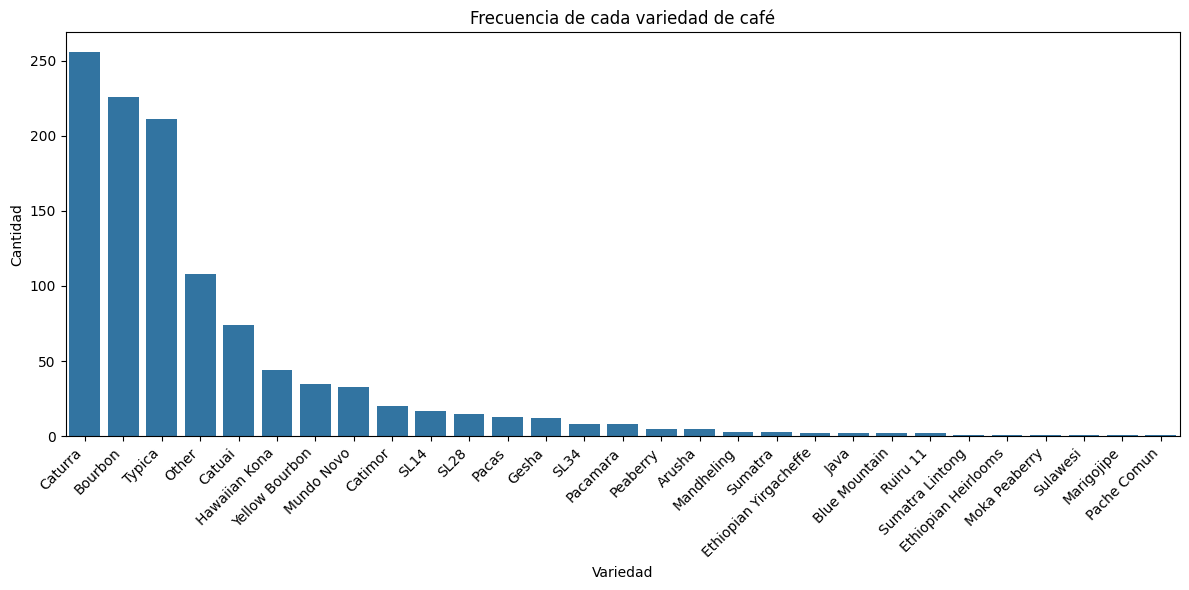

In [ ]:
# Crear el gráfico de barras para Variety
plt.figure(figsize=(12, 6))
sns.countplot(data=base_2, x='Variety', order=base_2['Variety'].value_counts().index)

# Personalizar el gráfico
plt.title('Frecuencia para la  variedad de café')
plt.xlabel('Variedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

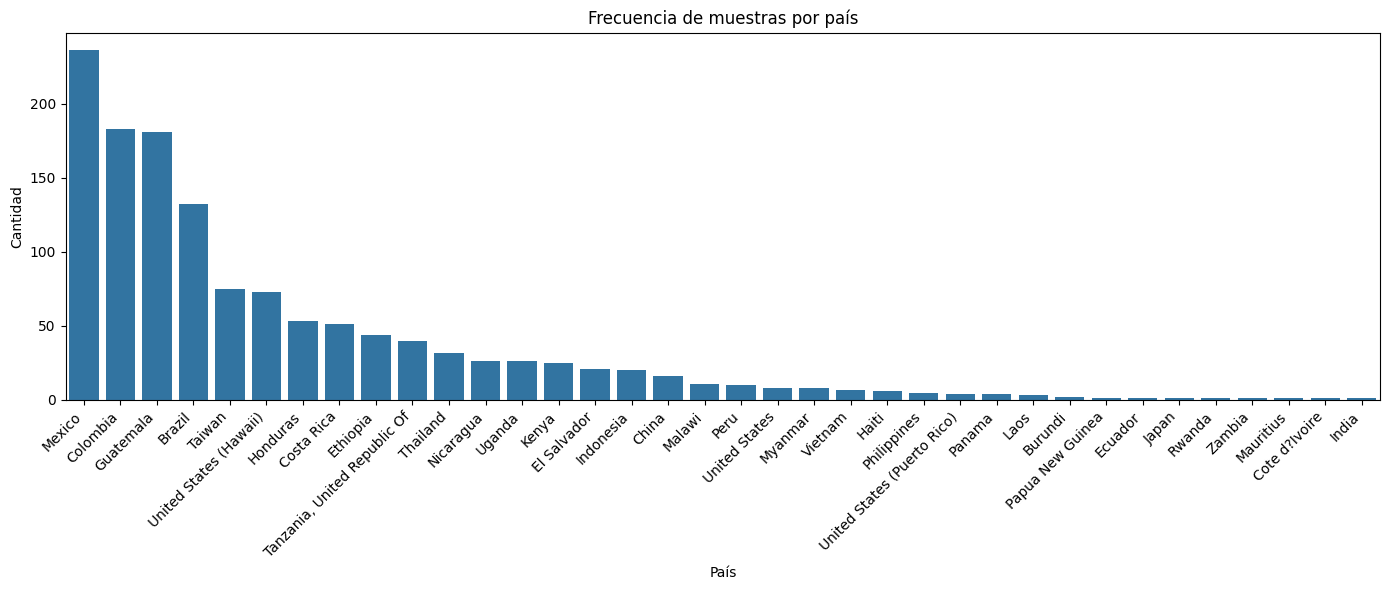

In [ ]:
# Crear el gráfico de barras para Country
plt.figure(figsize=(12, 6))
sns.countplot(data=base_2, x='Country.of.Origin', order=base_2['Country.of.Origin'].value_counts().index)

# Personalizar el gráfico
plt.title('Frecuencia de muestras por país')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Las variedades de café caturra, Bourbon y typica son las de mayor análisis sensorial por parte de los catadores, asimismo, Mexico, Colombia, Guatemala Y Brazil son los países que mas aportaron muestras de café para el análisis.

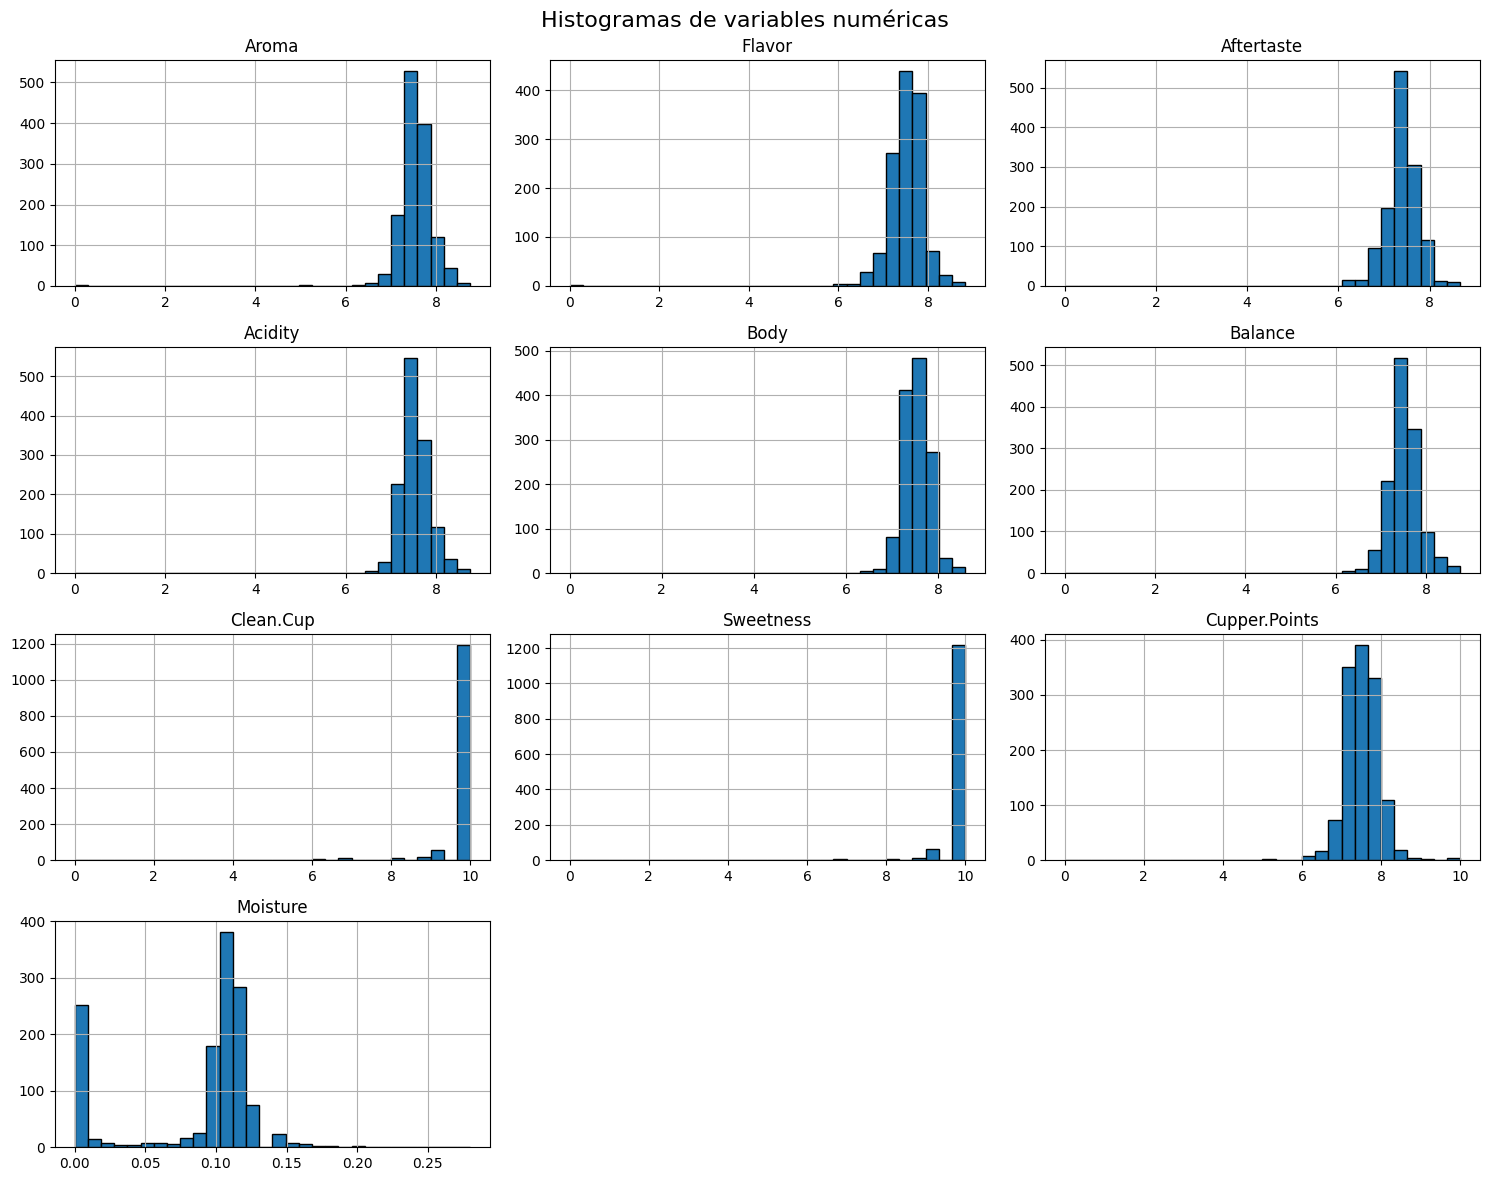

In [ ]:
numeric_cols = base_cuanti.select_dtypes(include='number').columns

# Crear un histograma para cada columna numérica
base_cuanti[numeric_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histogramas de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

Se observa la distribución de las variables numéricas. A priori, la mayoría de estas presenta un comportamiento normal. La variable Moisture pareciera ser multimodal y se encuentran valores cercanos cero en una alta proporción.

En la siguiente gráfica se muestra la relación lineal entre la variable objetivo y las demás variables asociadas a las cualidades de taza de café, se puede observar que  seis de las variables explicativas presentan una buena asociación lineal con la variable puntuación, sin embargo, las variables Clean.Cup, Sweetness y Moinsture presentan valores bajos por lo que podrán en principio ser excluidas del estudio, sin mbargo, se van a mantener para ajustar algunos modelos y luego si definir su significancia para explicar la variable objetivo.

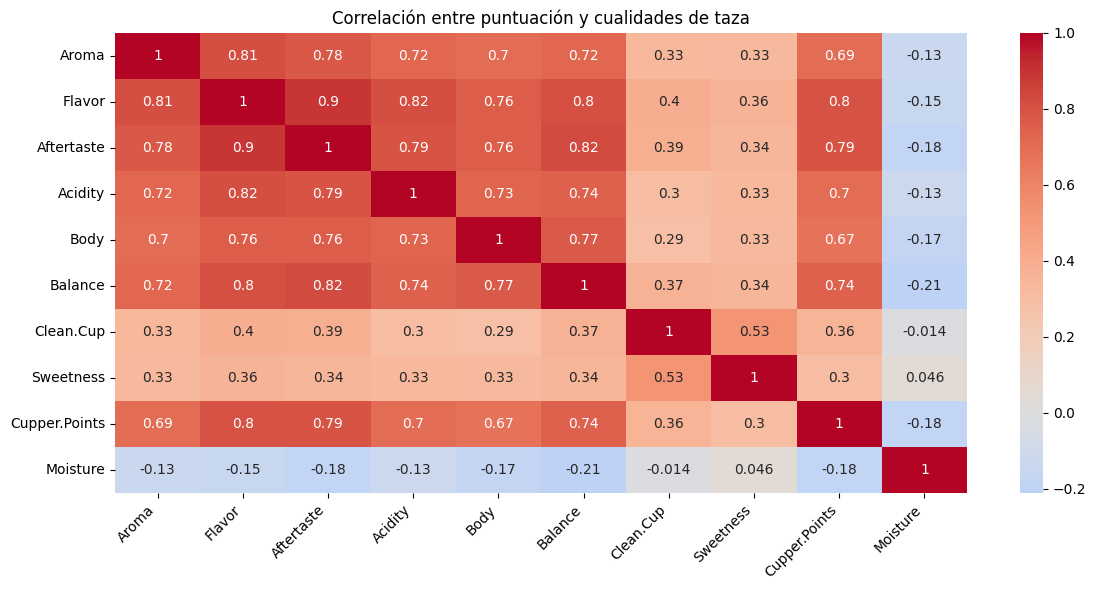

In [17]:
plt.figure(figsize=(12, 6))
correlation_matrix = base_cuanti.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0);

# Personalizar el gráfico
plt.title('Correlación entre puntuación y cualidades de taza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()